# Heart Disease Prediction Model

In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [117]:
df = pd.read_csv('https://raw.githubusercontent.com/AkarshVyas/Machine-Learning-Part-1/refs/heads/main/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### EDA

In [118]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [119]:
df.shape

(918, 12)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [121]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [122]:
df.duplicated().sum()

0

In [123]:
df['HeartDisease'].value_counts()  # should be equally distributed to avoid biasedness

HeartDisease
1    508
0    410
Name: count, dtype: int64

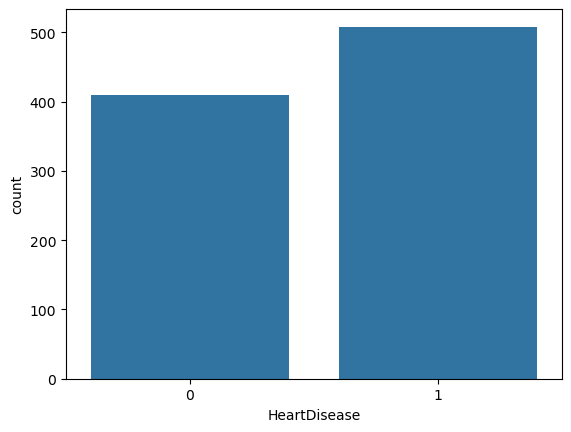

In [124]:
sns.barplot(df['HeartDisease'].value_counts())
plt.show()

In [125]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

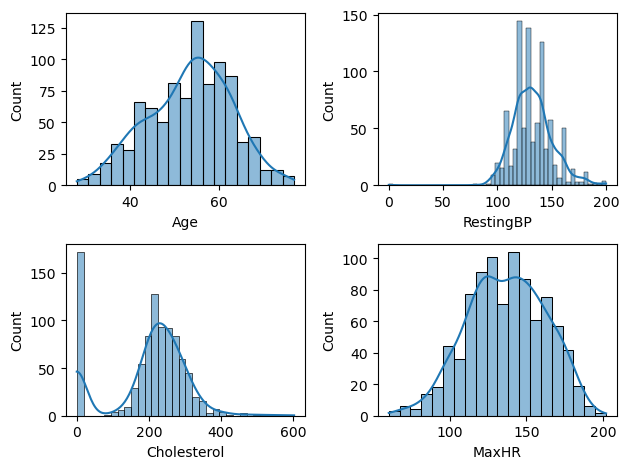

In [126]:
def plotting(var, num):
    plt.subplot(2,2,num)
    sns.histplot(df[var], kde=True)

plotting('Age', 1)
plotting('RestingBP', 2)
plotting('Cholesterol', 3)
plotting('MaxHR', 4)

plt.tight_layout()

In [127]:
df['Cholesterol'].value_counts()

# no one can have cholesterol 0 hence wrong data hence fill it up with mean
# also restingBP cant be 0

Cholesterol
0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: count, Length: 222, dtype: int64

In [128]:
ch_mean = df.loc[df['Cholesterol'] != 0, 'Cholesterol'].mean().round(2)
ch_mean

244.64

In [129]:
df['Cholesterol'] = df['Cholesterol'].replace(0, ch_mean)

In [130]:
rBP_mean = df.loc[df['RestingBP'] != 0, 'RestingBP'].mean().round(2)
df['RestingBP'] = df['RestingBP'].replace(0, ch_mean)

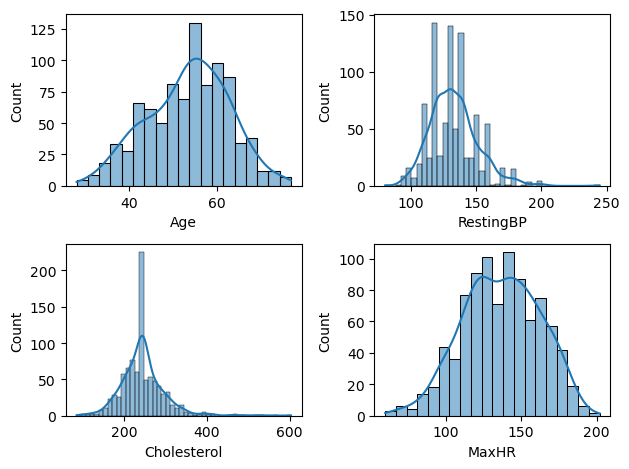

In [131]:
def plotting(var, num):
    plt.subplot(2,2,num)
    sns.histplot(df[var], kde=True)

plotting('Age', 1)
plotting('RestingBP', 2)
plotting('Cholesterol', 3)
plotting('MaxHR', 4)

plt.tight_layout()

<Axes: xlabel='Sex', ylabel='count'>

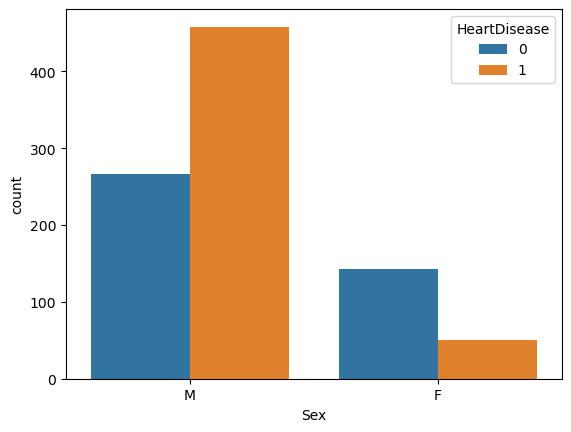

In [132]:
# best for categorial
sns.countplot(x = df['Sex'], hue=df['HeartDisease'])

<Axes: xlabel='ChestPainType', ylabel='count'>

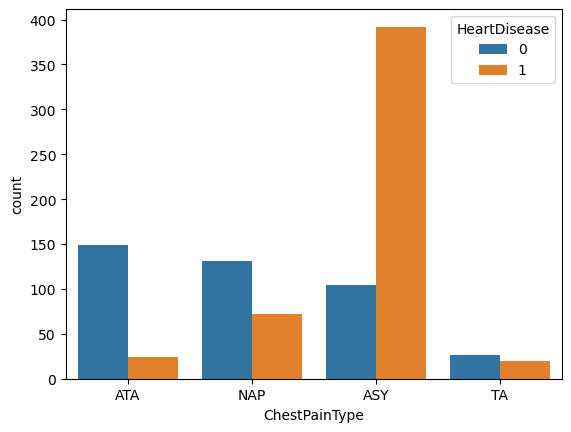

In [133]:
sns.countplot(x = df['ChestPainType'], hue=df['HeartDisease'])

<Axes: xlabel='FastingBS', ylabel='count'>

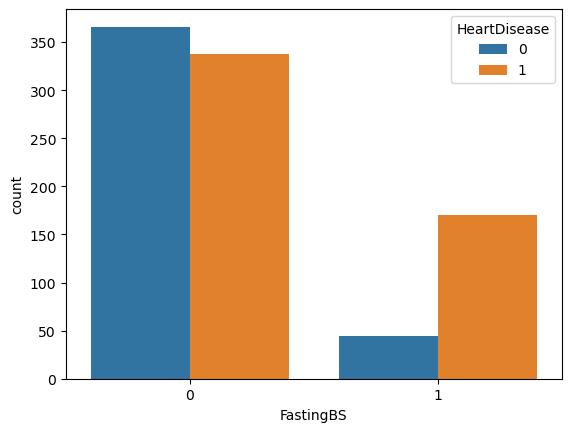

In [134]:
sns.countplot(x = df['FastingBS'], hue=df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

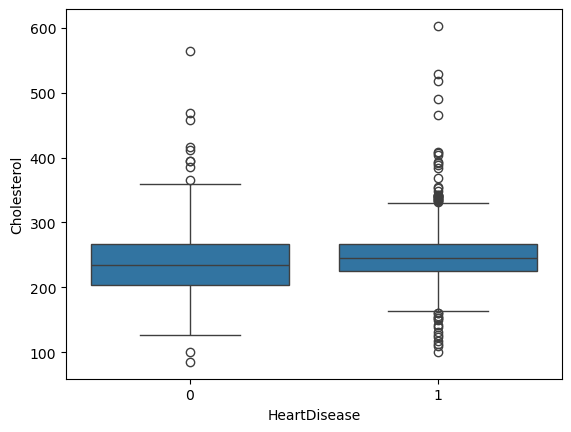

In [135]:
sns.boxplot(x = df['HeartDisease'] ,y = df['Cholesterol'])

<Axes: xlabel='HeartDisease', ylabel='Age'>

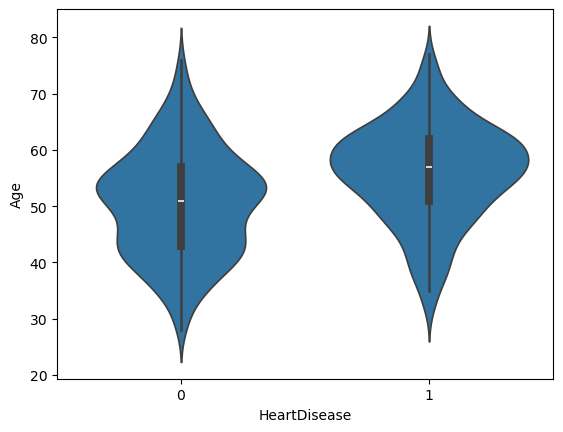

In [136]:
sns.violinplot(x = df['HeartDisease'], y=df['Age'])

<Axes: >

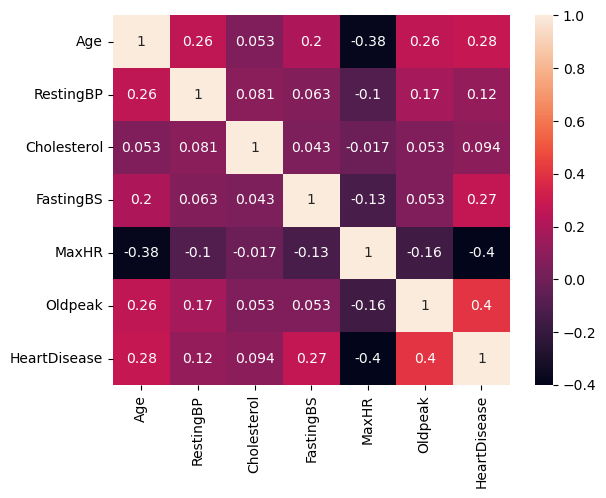

In [137]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

### Data preprocessing and cleaning

In [138]:
df_encode = pd.get_dummies(df, drop_first=True)

In [139]:
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144.0,193.0,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130.0,131.0,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130.0,236.0,0,174,0.0,1,False,True,False,False,False,False,False,True,False


In [140]:
df_encode = df_encode.astype(int)

In [141]:
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0,1,0,1,0,0,0,0,0,1,0


In [142]:
df_encode.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

### Splitting Data

In [144]:
X = df_encode.drop('HeartDisease', axis=1)
y = df_encode['HeartDisease']

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Feature Scaling

In [146]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [147]:
X_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
795,42,120,240,1,194,0,1,0,1,0,1,0,0,0,0
25,36,130,209,0,178,0,1,0,1,0,1,0,0,0,1
84,56,150,213,1,125,1,1,0,0,0,1,0,1,1,0
10,37,130,211,0,142,0,0,0,1,0,1,0,0,0,1
344,51,120,244,1,104,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,48,120,254,0,110,0,0,0,0,0,0,1,0,0,1
270,45,120,225,0,140,0,1,0,0,0,1,0,0,0,1
860,60,130,253,0,144,1,1,0,0,0,1,0,1,0,1
435,60,152,244,0,118,0,1,0,0,0,0,1,1,0,1


## Model Building

In [152]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

In [153]:
result = []

In [154]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    result.append({
        'model': name,
        'accuracy': round(acc, 4),
        'f1 score': round(f1, 4)
    })

In [155]:
result = pd.DataFrame(result)
result

,model,accuracy,f1 score
0,Logistic Regression,0.8696,0.8857
1,Naive Bayes,0.8533,0.8683
2,Decision Tree,0.7826,0.8020
3,SVM,0.8478,0.8679
4,KNN,0.8696,0.8857


## Saving the best model for adding the frontend

In [157]:
import joblib
joblib.dump(models['KNN'], 'KNN_heart.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X.columns.tolist() , 'columns.pkl')

['columns.pkl']